In [1]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.3.1

Found existing installation: scikit-learn 1.3.1
Uninstalling scikit-learn-1.3.1:
  Successfully uninstalled scikit-learn-1.3.1
  Using cached scikit_learn-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.9 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.13.0 requires scikit-learn<2,>=1.3.2, but you have scikit-learn 1.3.1 which is incompatible.


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as spst

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
pd_sas22 = pd.read_sas('./data_set1.sas7bdat', format='sas7bdat')
pd_sas23 = pd.read_sas('./data_set2.sas7bdat', format='sas7bdat')

In [3]:
df_merged=pd.concat([pd_sas22, pd_sas23], ignore_index=True)
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13194 entries, 0 to 13193
Columns: 675 entries, mod_d to LF_SECUR_Y
dtypes: float64(632), object(43)
memory usage: 67.9+ MB


### 데이터 전처리

In [4]:
import pandas as pd

# 예제 DataFrame (실제 df_merged를 사용하세요)
# df_merged = pd.read_csv("your_dataset.csv")

# 선택할 변수명 리스트
columns_to_select = [
    "sex", "age", "allownc", "npins", "DI1_dg", "DI2_dg", "DE1_dg", "DJ4_dg", "DL1_dg",
    "DJ8_dg", "DJ6_dg", "DH4_dg", "DN1_dg", "EC_occp", "HE_obe", "BD1_11",
    "BD2_14", "BP16_1", "BP16_2", "BS3_1", "BS3_2", "BS12_47", "BS12_47_1",
    "BE3_73", "BE3_83", "BE3_77", "BE3_87", "BE9", "BE5_1", "HE_fh",
    "HE_HPfh1", "HE_HPfh2", "HE_HPfh3", "HE_HLfh1", "HE_HLfh2", "HE_HLfh3",
    "HE_IHDfh1", "HE_IHDfh2", "HE_IHDfh3", "HE_STRfh1", "HE_STRfh2",
    "HE_STRfh3", "HE_DMfh1", "HE_DMfh2", "HE_DMfh3", "L_BR_FQ", "L_LN_FQ",
    "L_DN_FQ"
]

# 새로운 데이터프레임 생성
df_selected = df_merged[columns_to_select]

# 결과 확인
df_selected.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13194 entries, 0 to 13193
Data columns (total 48 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        13194 non-null  float64
 1   age        13194 non-null  float64
 2   allownc    13194 non-null  float64
 3   npins      13194 non-null  float64
 4   DI1_dg     13185 non-null  float64
 5   DI2_dg     13185 non-null  float64
 6   DE1_dg     13185 non-null  float64
 7   DJ4_dg     13185 non-null  float64
 8   DL1_dg     13185 non-null  float64
 9   DJ8_dg     13185 non-null  float64
 10  DJ6_dg     13185 non-null  float64
 11  DH4_dg     13185 non-null  float64
 12  DN1_dg     13185 non-null  float64
 13  EC_occp    13185 non-null  float64
 14  HE_obe     10977 non-null  float64
 15  BD1_11     13185 non-null  float64
 16  BD2_14     13185 non-null  float64
 17  BP16_1     13185 non-null  float64
 18  BP16_2     13185 non-null  float64
 19  BS3_1      13185 non-null  float64
 20  BS3_2 

In [5]:
# 질병(종속변수)의 변수명이 D로 시작하고 dg로 끝남
dependent_columns = [col for col in df_selected.columns if col.startswith('D') and col.endswith('dg')]

# 종속변수의 데이터 분포 확인
disease_value_counts = df_selected[dependent_columns].apply(lambda x: x.value_counts())

# 결과 출력
print(disease_value_counts)

     DI1_dg  DI2_dg  DE1_dg  DJ4_dg  DL1_dg  DJ8_dg  DJ6_dg  DH4_dg  DN1_dg
0.0    8019    8283    9853    9946    9882    8549    9481    9573   10034
1.0    3206    2942    1372     348     412    1745     813     721     260
8.0    1959    1959    1959    1959    1959    1959    1959    1959    1959
9.0       1       1       1     932     932     932     932     932     932


In [6]:
# 8은 0으로 대체
df_selected[dependent_columns] = df_selected[dependent_columns].replace(8, 0)

# 9는 삭제
df_selected = df_selected[~(df_selected[dependent_columns] == 9).any(axis=1)]

disease_value_counts = df_selected[dependent_columns].apply(lambda x: x.value_counts())

# 결과 확인
print(disease_value_counts)

     DI1_dg  DI2_dg  DE1_dg  DJ4_dg  DL1_dg  DJ8_dg  DJ6_dg  DH4_dg  DN1_dg
0.0    9358    9550   11038   11905   11841   10508   11440   11532   11993
1.0    2895    2703    1215     348     412    1745     813     721     260


C:\Users\uesr\AppData\Local\Temp\ipykernel_19608\3079253377.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected[dependent_columns] = df_selected[dependent_columns].replace(8, 0)


In [7]:
# 종속변수가 결측치인 행 삭제
df_selected = df_selected.dropna(subset=dependent_columns)

df_selected[dependent_columns].isnull().sum()


DI1_dg    0
DI2_dg    0
DE1_dg    0
DJ4_dg    0
DL1_dg    0
DJ8_dg    0
DJ6_dg    0
DH4_dg    0
DN1_dg    0
dtype: int64

In [8]:
# 남은 변수의 결측치 확인
df_selected.isnull().sum().sort_values(ascending=False)

HE_obe       2157
HE_fh        1781
HE_HLfh2     1295
HE_HLfh1     1295
HE_IHDfh1    1295
HE_IHDfh2    1295
HE_IHDfh3    1295
HE_HLfh3     1295
HE_STRfh2    1295
HE_STRfh3    1295
HE_DMfh1     1295
HE_DMfh2     1295
HE_DMfh3     1295
HE_HPfh2     1295
HE_HPfh1     1295
HE_STRfh1    1295
HE_HPfh3     1295
L_LN_FQ       394
L_DN_FQ       394
L_BR_FQ       394
DJ8_dg          0
DJ6_dg          0
DL1_dg          0
DH4_dg          0
npins           0
DE1_dg          0
DI2_dg          0
DI1_dg          0
age             0
allownc         0
sex             0
DJ4_dg          0
BD1_11          0
EC_occp         0
DN1_dg          0
BE5_1           0
BE3_83          0
BE3_77          0
BE3_87          0
BE9             0
BS3_1           0
BP16_2          0
BP16_1          0
BS3_2           0
BD2_14          0
BS12_47         0
BS12_47_1       0
BE3_73          0
dtype: int64

In [9]:
# MICE 결측치 대체
miceimputer = IterativeImputer(random_state=42)
df_processed = pd.DataFrame(miceimputer.fit_transform(df_selected), columns=df_selected.columns)
df_processed.isnull().sum()

sex          0
age          0
allownc      0
npins        0
DI1_dg       0
DI2_dg       0
DE1_dg       0
DJ4_dg       0
DL1_dg       0
DJ8_dg       0
DJ6_dg       0
DH4_dg       0
DN1_dg       0
EC_occp      0
HE_obe       0
BD1_11       0
BD2_14       0
BP16_1       0
BP16_2       0
BS3_1        0
BS3_2        0
BS12_47      0
BS12_47_1    0
BE3_73       0
BE3_83       0
BE3_77       0
BE3_87       0
BE9          0
BE5_1        0
HE_fh        0
HE_HPfh1     0
HE_HPfh2     0
HE_HPfh3     0
HE_HLfh1     0
HE_HLfh2     0
HE_HLfh3     0
HE_IHDfh1    0
HE_IHDfh2    0
HE_IHDfh3    0
HE_STRfh1    0
HE_STRfh2    0
HE_STRfh3    0
HE_DMfh1     0
HE_DMfh2     0
HE_DMfh3     0
L_BR_FQ      0
L_LN_FQ      0
L_DN_FQ      0
dtype: int64

In [10]:
# 독립변수와 종속변수로 나누기
y = df_processed[dependent_columns].copy()
x = df_processed.drop(columns=dependent_columns).copy()

<ipython-input-13-5c8e02708dea>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x[col], palette="Set2")
<ipython-input-13-5c8e02708dea>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x[col], palette="Set2")
<ipython-input-13-5c8e02708dea>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x[col], palette="Set2")
<ipython-input-13-5c8e02708dea>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

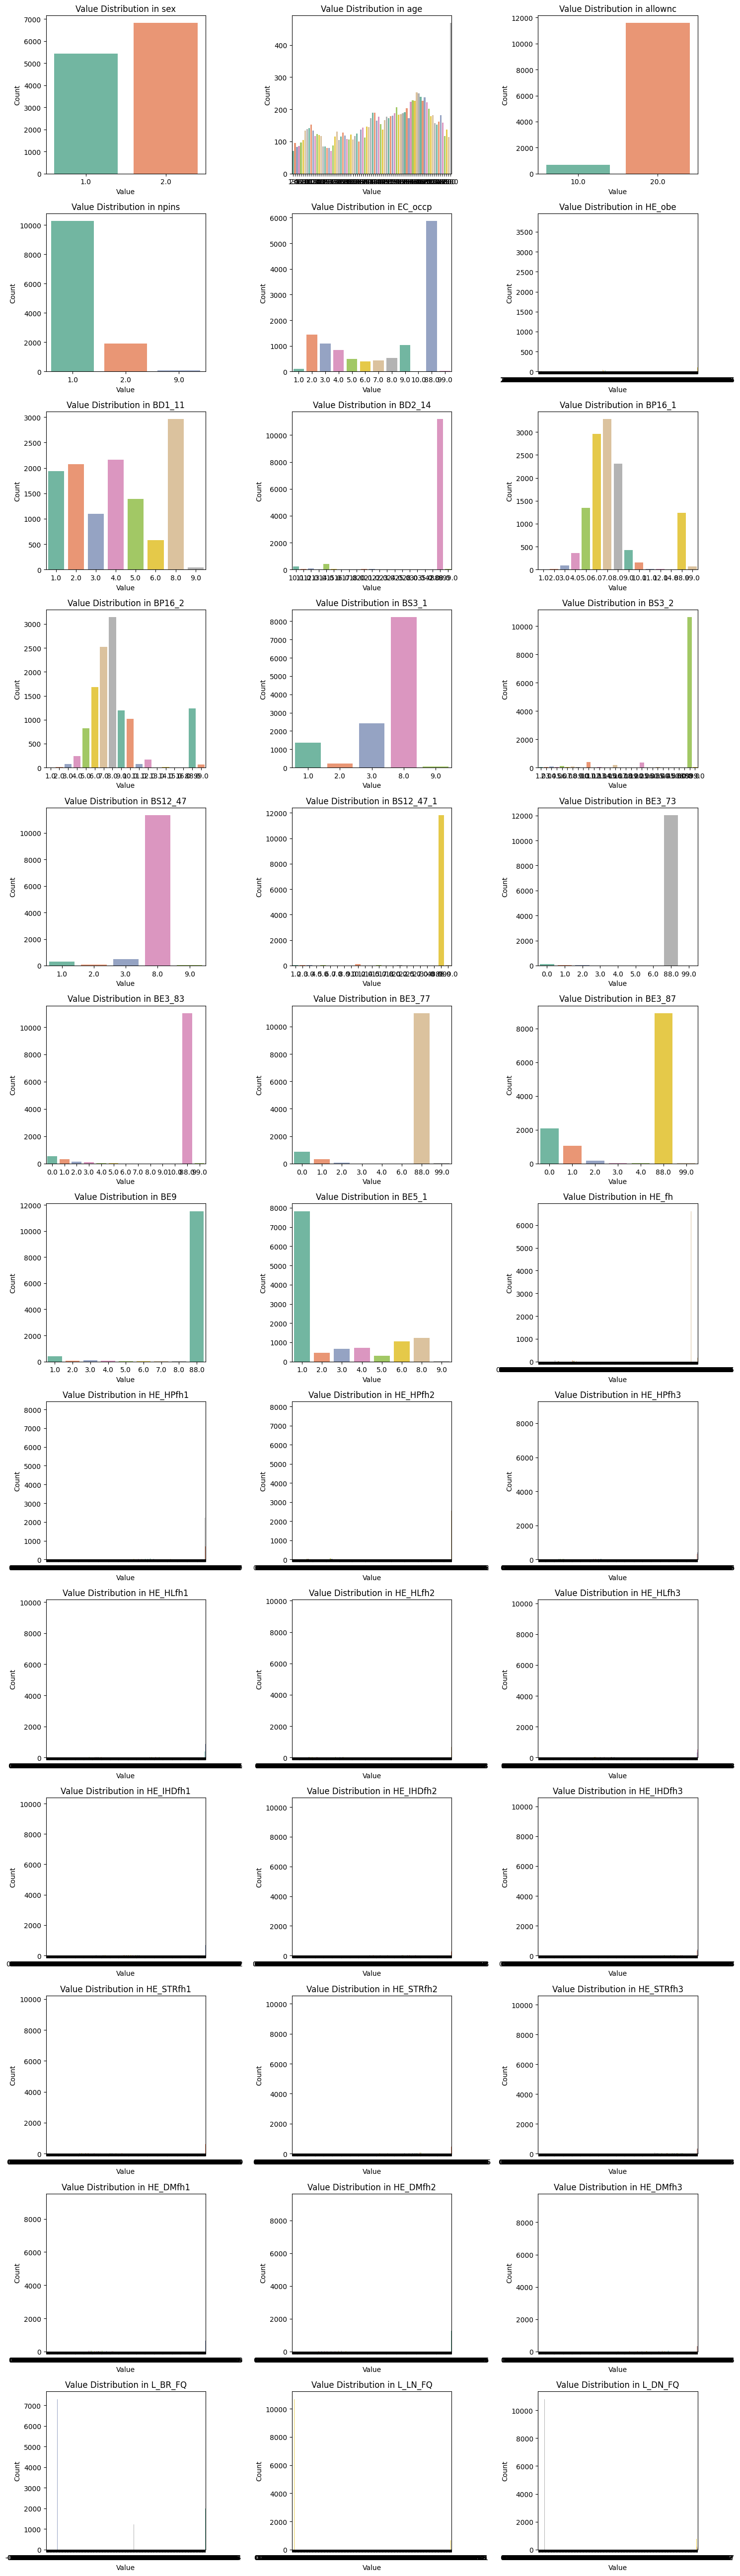

In [ ]:
# 독립변수 분포 시각화
import math
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터프레임 x의 열들로 대상 변수 설정
target_columns = x.columns

# 서브플롯 설정
num_columns = len(target_columns)
columns_per_row = 3  # 한 행당 서브플롯 수
num_rows = math.ceil(num_columns / columns_per_row)  # 필요한 행의 수

# Figure 사이즈 설정
plt.figure(figsize=(columns_per_row * 5, num_rows * 4))

# 열별로 값의 분포 시각화
for i, col in enumerate(target_columns, 1):
    plt.subplot(num_rows, columns_per_row, i)
    sns.countplot(x=x[col], palette="Set2")
    plt.title(f'Value Distribution in {col}')
    plt.xlabel('Value')
    plt.ylabel('Count')

# 간격 조정
plt.tight_layout()
plt.show()


In [11]:
# 독립변수 분포 확인 후 클래스 불균형이 너무 심하거나 다른 변수로도 대체가능할 것으로 보이는 변수 삭제
x_cleaned = x.drop(columns=['BS3_2', 'BS12_47', 'BS12_47_1', 'BE3_73', 'BE3_83', 'BE3_77', 'BE3_87', 'BE9'])

In [12]:
import pandas as pd

# 값 변경 함수
def modify_values(df):
    # allownc열
    df['allownc'] = df['allownc'].replace({10: 1, 20 : 0})

    # npins 열
    df['npins'] = df['npins'].replace({9: 1, 2: 0})

    # EC_occp 열
    df['EC_occp'] = df['EC_occp'].replace({88: 11, 99: 11})  #(무직)

    # BE9 열
    df['EC_occp'] = df['EC_occp'].replace({88: 1, 99: 1})

    # BS5_1 열
    df['BE5_1'] = df['BE5_1'].replace({9: 1, 8:1})

    # BD1_11 열
    df['BD1_11'] = df['BD1_11'].replace({8: 1, 9: 1})

    # BD2_14 열
    df['BD2_14'] = df['BD2_14'].replace({888: 0, 999: 0})

    # BP16_1 열
    bp16_1_mode = df['BP16_1'].mode()[0]  # BP16_1 최빈값 계산
    df['BP16_1'] = df['BP16_1'].replace({1: 5, 2: 5, 3: 5, 4: 5,
                                         10: 9, 11: 9, 12: 9, 13: 9, 14: 9,
                                         88: bp16_1_mode, 99: bp16_1_mode})

    # BP16_2 열
    bp16_2_mode = df['BP16_2'].mode()[0]  # BP16_2 최빈값 계산
    df['BP16_2'] = df['BP16_2'].replace({1: 5, 2: 5, 3: 5, 4: 5,
                                         10: 9, 11: 9, 12: 9, 13: 9, 14: 9, 15: 9, 16: 9,
                                         88: bp16_2_mode, 99: bp16_2_mode})

    # BS3_1 열
    df['BS3_1'] = df['BS3_1'].replace({2: 1, 8: 0, 9: 0, 3:0})

    return df

# x_cleaned 데이터프레임 값 변경 적용
x_cleaned = modify_values(x_cleaned)


In [13]:
# 'HE'로 시작하는 변수와 'L'로 시작하고 'FQ'로 끝나는 변수 선택
columns_to_round = [col for col in x_cleaned.columns if col.startswith('HE') or (col.startswith('L') and col.endswith('FQ'))]

# 선택된 열에 대해 반올림과 반내림
for col in columns_to_round:
    # 반올림
    x_cleaned[f'{col}'] = np.round(x_cleaned[col])
    # 반내림 (내림은 floor 사용)
    x_cleaned[f'{col}'] = np.floor(x_cleaned[col])

# 결과 확인
x_cleaned.head()


,sex,age,allownc,npins,EC_occp,HE_obe,BD1_11,BD2_14,BP16_1,BP16_2,...,HE_IHDfh3,HE_STRfh1,HE_STRfh2,HE_STRfh3,HE_DMfh1,HE_DMfh2,HE_DMfh3,L_BR_FQ,L_LN_FQ,L_DN_FQ
0,2.0,56.0,0.0,1.0,11.0,4.0,1.0,0.0,8.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0,1.0
1,1.0,30.0,0.0,1.0,5.0,4.0,3.0,0.0,7.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0
2,2.0,25.0,0.0,1.0,11.0,2.0,4.0,0.0,6.0,8.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,1.0,2.0
3,1.0,66.0,0.0,1.0,11.0,3.0,3.0,0.0,9.0,9.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
4,2.0,62.0,0.0,1.0,9.0,2.0,2.0,0.0,7.0,9.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0


In [14]:
# 식사 여부와 관련된 변수 삭제
columns_meal = [c for c in x_cleaned.columns if c.startswith('L') and c.endswith('FQ')]
x_cleaned = x_cleaned.drop(columns=columns_meal)

# 'HE'로 시작하면서 'HE_obe'를 제외하는 변수 처리 함수
def replace_he_values_excluding_obe(df):
    # 'HE'로 시작하는 변수들 중에서 'HE_obe' 제외
    he_columns = [col for col in df.columns if col.startswith('HE') and col != 'HE_obe']

    # 조건에 맞는 값(8, 9)을 1로 변환
    df[he_columns] = df[he_columns].applymap(lambda x: 1 if x in [2, 3, 4, 5, 8, 9] else x)

    return df

# 함수 적용
x_cleaned_updated = replace_he_values_excluding_obe(x_cleaned)

C:\Users\uesr\AppData\Local\Temp\ipykernel_19608\325571042.py:11: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[he_columns] = df[he_columns].applymap(lambda x: 1 if x in [2, 3, 4, 5, 8, 9] else x)


In [16]:
x_cleaned_updated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12253 entries, 0 to 12252
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        12253 non-null  float64
 1   age        12253 non-null  float64
 2   allownc    12253 non-null  float64
 3   npins      12253 non-null  float64
 4   EC_occp    12253 non-null  float64
 5   HE_obe     12253 non-null  float64
 6   BD1_11     12253 non-null  float64
 7   BD2_14     12253 non-null  float64
 8   BP16_1     12253 non-null  float64
 9   BP16_2     12253 non-null  float64
 10  BS3_1      12253 non-null  float64
 11  BE5_1      12253 non-null  float64
 12  HE_fh      12253 non-null  float64
 13  HE_HPfh1   12253 non-null  float64
 14  HE_HPfh2   12253 non-null  float64
 15  HE_HPfh3   12253 non-null  float64
 16  HE_HLfh1   12253 non-null  float64
 17  HE_HLfh2   12253 non-null  float64
 18  HE_HLfh3   12253 non-null  float64
 19  HE_IHDfh1  12253 non-null  float64
 20  HE_IHD

In [17]:
min_age = x_cleaned_updated['age'].min()
max_age = x_cleaned_updated['age'].max()

print(f"최솟값: {min_age}")
print(f"최댓값: {max_age}")


최솟값: 1.0
최댓값: 80.0


<ipython-input-19-48a36b9473f0>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x_cleaned_updated[col], palette="Set2")
<ipython-input-19-48a36b9473f0>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x_cleaned_updated[col], palette="Set2")
<ipython-input-19-48a36b9473f0>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=x_cleaned_updated[col], palette="Set2")
<ipython-input-19-48a36b9473f0>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `

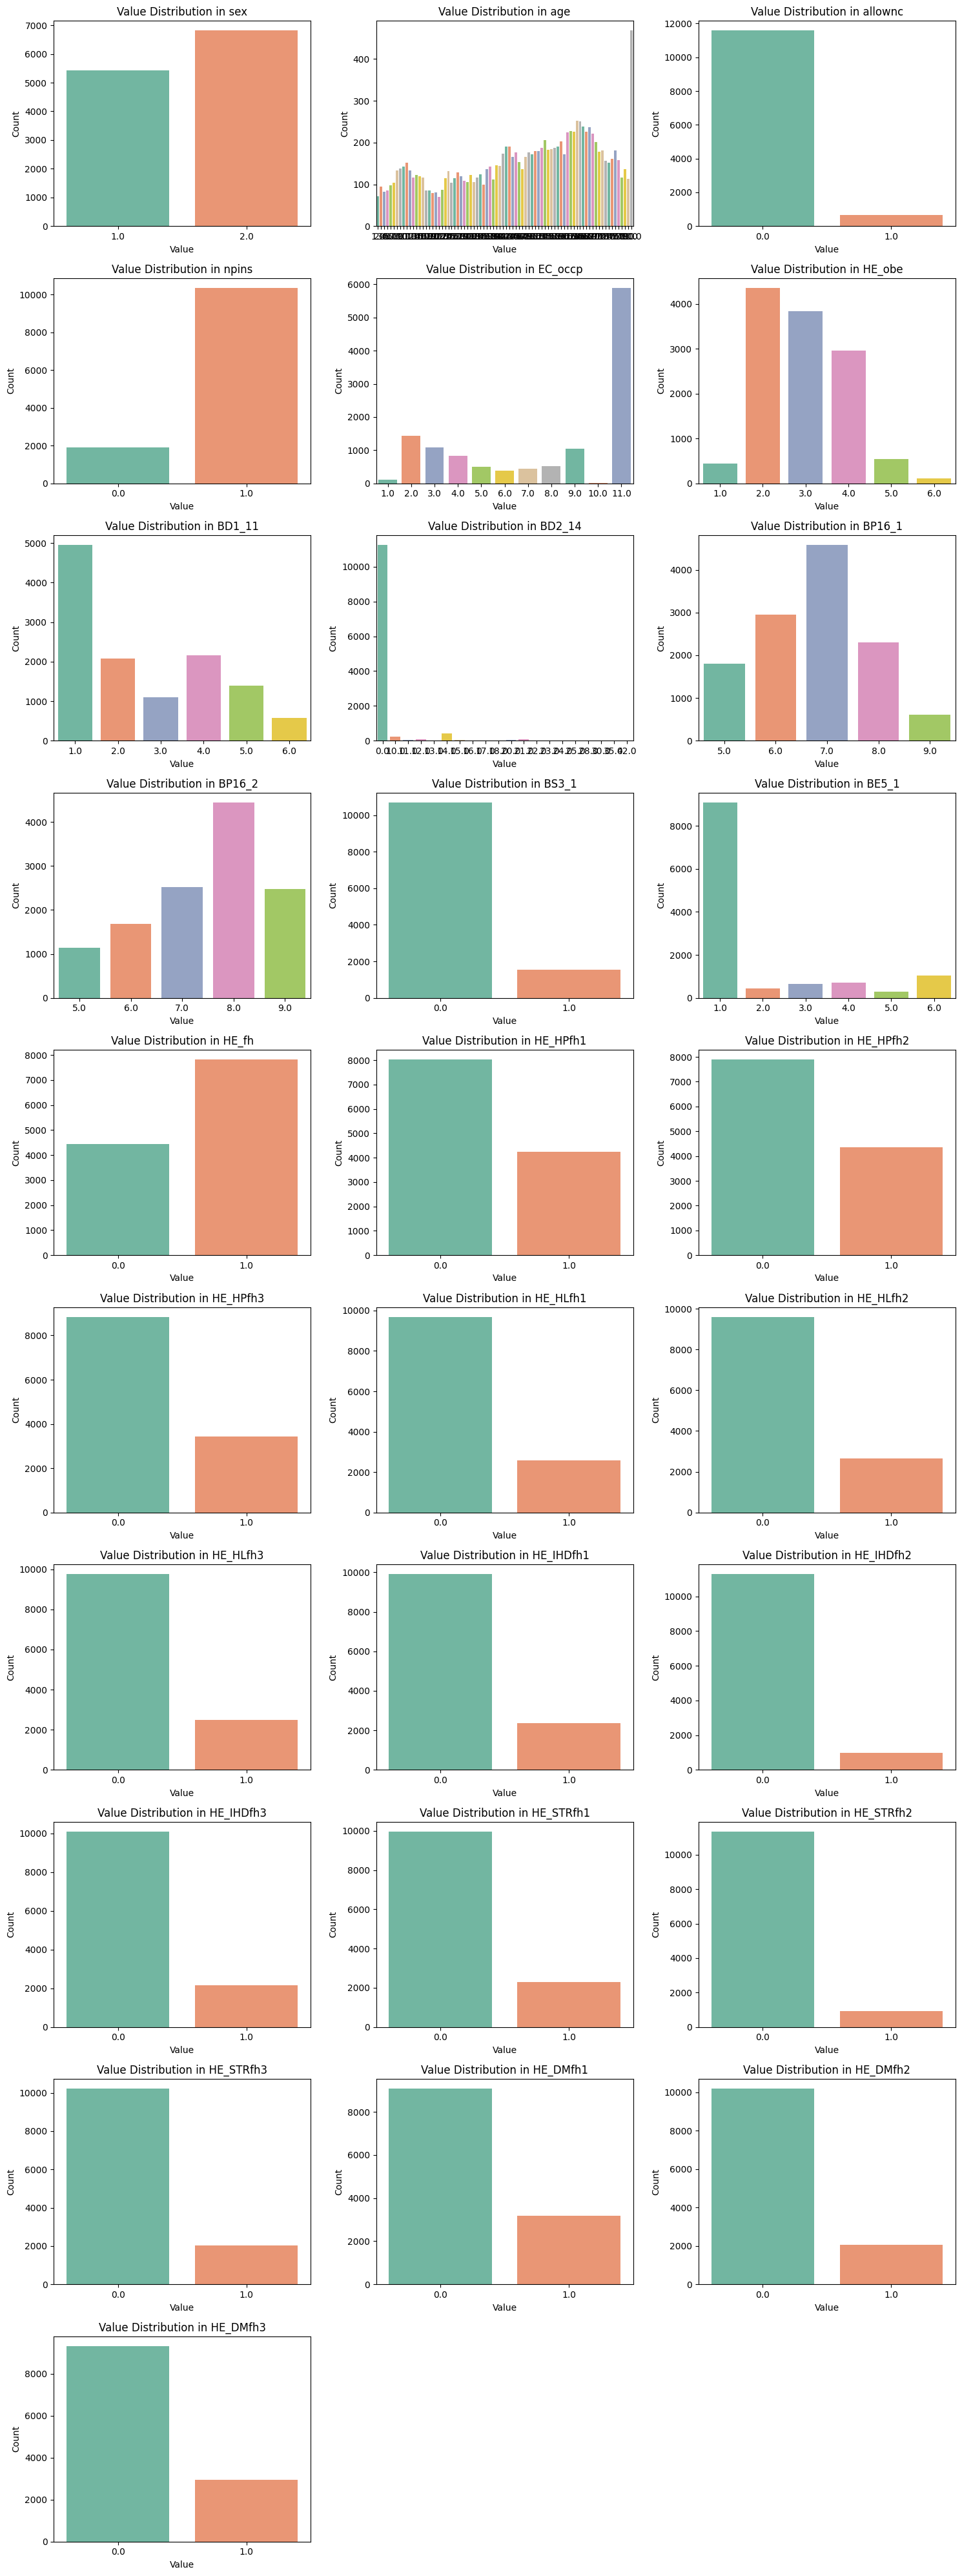

In [ ]:
# 독립변수 분포 시각화
import math
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터프레임 x의 열들로 대상 변수 설정
target_columns = x_cleaned_updated.columns

# 서브플롯 설정
num_columns = len(target_columns)
columns_per_row = 3  # 한 행당 서브플롯 수
num_rows = math.ceil(num_columns / columns_per_row)  # 필요한 행의 수

# Figure 사이즈 설정
plt.figure(figsize=(columns_per_row * 5, num_rows * 4))

# 열별로 값의 분포 시각화
for i, col in enumerate(target_columns, 1):
    plt.subplot(num_rows, columns_per_row, i)
    sns.countplot(x=x_cleaned_updated[col], palette="Set2")
    plt.title(f'Value Distribution in {col}')
    plt.xlabel('Value')
    plt.ylabel('Count')

# 간격 조정
plt.tight_layout()
plt.show()


### 모델링

In [18]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, fbeta_score
import xgboost as xgb
import joblib  # 모델 저장을 위한 라이브러리
import os

# 결과를 저장할 딕셔너리
xgboost_results = {}

# 하이퍼파라미터 그리드 확장
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10, 12],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# RandomizedSearchCV 설정
grid_search = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', random_state=42, use_label_encoder=False),
    param_distributions=param_grid,
    n_iter=50,
    scoring='roc_auc',  # AUC 기반 평가
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# 각 y 변수별 독립적으로 처리
for column in y.columns:
    print(f"\nProcessing target variable: {column}")

    # 현재 종속 변수 선택
    y_current = y[column]

    # 학습/테스트 데이터 분리
    X_train, X_test, y_train, y_test = train_test_split(
        x_cleaned_updated, y_current, test_size=0.2, random_state=42, stratify=y_current
    )

    # 클래스 분포 확인
    print(f"Original class distribution for {column}: {Counter(y_train)}")

    # 언더샘플링 전략 정의
    class_counts = Counter(y_train)
    target_majority_class = max(class_counts, key=class_counts.get)
    target_minority_class = min(class_counts, key=class_counts.get)

    sampling_strategy = {
        target_majority_class: class_counts[target_minority_class] * 3,
        target_minority_class: class_counts[target_minority_class]
    }

    # 언더샘플링
    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
    X_under, y_under = under_sampler.fit_resample(X_train, y_train)
    print(f"After undersampling class distribution for {column}: {Counter(y_under)}")

    # SMOTE 오버샘플링
    smote = SMOTE(sampling_strategy="minority", random_state=42, k_neighbors=3)
    X_balanced, y_balanced = smote.fit_resample(X_under, y_under)
    print(f"After SMOTE oversampling class distribution for {column}: {Counter(y_balanced)}")

    # RandomizedSearchCV로 하이퍼파라미터 튜닝
    grid_search.fit(X_balanced, y_balanced)

    # 최적의 하이퍼파라미터 및 모델
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Best Parameters for {column}: {best_params}")

    # 테스트 데이터 평가
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]  # 양성 클래스 확률

    # 성능 평가
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)  # F2 Score 추가

    # 결과 저장
    xgboost_results[column] = {
        "best_model": best_model,
        "best_params": best_params,
        "accuracy": accuracy,
        "auc": auc,
        "f1": f1,
        "f2": f2
    }

    # 모델 저장 디렉토리 생성
    output_dir = "models"
    os.makedirs(output_dir, exist_ok=True)  # 디렉토리 없으면 생성

    # 모델 파일로 저장
    model_filename = os.path.join(output_dir, f"best_model_{column}_xgb.pkl")
    joblib.dump(best_model, model_filename)
    print(f"Model for {column} saved as {model_filename}")

    # 출력
    print(f"{column} - Accuracy: {accuracy:.4f}, AUC: {auc:.4f}, F1: {f1:.4f}, F2: {f2:.4f}")

# 최종 결과 출력
print("\nSummary of Results:")
for column, result in xgboost_results.items():
    print(f"{column}: Best Params = {result['best_params']}, Accuracy = {result['accuracy']:.4f}, AUC = {result['auc']:.4f}, F1 = {result['f1']:.4f}, F2 = {result['f2']:.4f}")



Processing target variable: DI1_dg
Original class distribution for DI1_dg: Counter({0.0: 7486, 1.0: 2316})
After undersampling class distribution for DI1_dg: Counter({0.0: 6948, 1.0: 2316})
After SMOTE oversampling class distribution for DI1_dg: Counter({0.0: 6948, 1.0: 6948})
Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\uesr\miniconda3\envs\finTech2025\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:55:44] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for DI1_dg: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.7}
Model for DI1_dg saved as models\best_model_DI1_dg_xgb.pkl
DI1_dg - Accuracy: 0.8201, AUC: 0.8846, F1: 0.6155, F2: 0.6120

Processing target variable: DI2_dg
Original class distribution for DI2_dg: Counter({0.0: 7640, 1.0: 2162})
After undersampling class distribution for DI2_dg: Counter({0.0: 6486, 1.0: 2162})
After SMOTE oversampling class distribution for DI2_dg: Counter({0.0: 6486, 1.0: 6486})
Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\uesr\miniconda3\envs\finTech2025\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:58:53] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for DI2_dg: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.7}
Model for DI2_dg saved as models\best_model_DI2_dg_xgb.pkl
DI2_dg - Accuracy: 0.7760, AUC: 0.8171, F1: 0.4786, F2: 0.4709

Processing target variable: DE1_dg
Original class distribution for DE1_dg: Counter({0.0: 8830, 1.0: 972})
After undersampling class distribution for DE1_dg: Counter({0.0: 2916, 1.0: 972})
After SMOTE oversampling class distribution for DE1_dg: Counter({0.0: 2916, 1.0: 2916})
Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\uesr\miniconda3\envs\finTech2025\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:00:46] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for DE1_dg: {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.7}
Model for DE1_dg saved as models\best_model_DE1_dg_xgb.pkl
DE1_dg - Accuracy: 0.8319, AUC: 0.8297, F1: 0.3602, F2: 0.4224

Processing target variable: DJ4_dg
Original class distribution for DJ4_dg: Counter({0.0: 9524, 1.0: 278})
After undersampling class distribution for DJ4_dg: Counter({0.0: 834, 1.0: 278})
After SMOTE oversampling class distribution for DJ4_dg: Counter({0.0: 834, 1.0: 834})
Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\uesr\miniconda3\envs\finTech2025\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:01:17] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for DJ4_dg: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
Model for DJ4_dg saved as models\best_model_DJ4_dg_xgb.pkl
DJ4_dg - Accuracy: 0.9323, AUC: 0.6356, F1: 0.0674, F2: 0.0773

Processing target variable: DL1_dg
Original class distribution for DL1_dg: Counter({0.0: 9472, 1.0: 330})
After undersampling class distribution for DL1_dg: Counter({0.0: 990, 1.0: 330})
After SMOTE oversampling class distribution for DL1_dg: Counter({0.0: 990, 1.0: 990})
Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\uesr\miniconda3\envs\finTech2025\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:01:53] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for DL1_dg: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.7}
Model for DL1_dg saved as models\best_model_DL1_dg_xgb.pkl
DL1_dg - Accuracy: 0.8882, AUC: 0.8207, F1: 0.2303, F2: 0.3405

Processing target variable: DJ8_dg
Original class distribution for DJ8_dg: Counter({0.0: 8406, 1.0: 1396})
After undersampling class distribution for DJ8_dg: Counter({0.0: 4188, 1.0: 1396})
After SMOTE oversampling class distribution for DJ8_dg: Counter({0.0: 4188, 1.0: 4188})
Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\uesr\miniconda3\envs\finTech2025\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:04:03] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for DJ8_dg: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
Model for DJ8_dg saved as models\best_model_DJ8_dg_xgb.pkl
DJ8_dg - Accuracy: 0.8013, AUC: 0.7054, F1: 0.2655, F2: 0.2573

Processing target variable: DJ6_dg
Original class distribution for DJ6_dg: Counter({0.0: 9152, 1.0: 650})
After undersampling class distribution for DJ6_dg: Counter({0.0: 1950, 1.0: 650})
After SMOTE oversampling class distribution for DJ6_dg: Counter({0.0: 1950, 1.0: 1950})
Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\uesr\miniconda3\envs\finTech2025\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:05:16] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for DJ6_dg: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
Model for DJ6_dg saved as models\best_model_DJ6_dg_xgb.pkl
DJ6_dg - Accuracy: 0.8829, AUC: 0.6766, F1: 0.1381, F2: 0.1399

Processing target variable: DH4_dg
Original class distribution for DH4_dg: Counter({0.0: 9225, 1.0: 577})
After undersampling class distribution for DH4_dg: Counter({0.0: 1731, 1.0: 577})
After SMOTE oversampling class distribution for DH4_dg: Counter({0.0: 1731, 1.0: 1731})
Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\uesr\miniconda3\envs\finTech2025\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:06:22] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for DH4_dg: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
Model for DH4_dg saved as models\best_model_DH4_dg_xgb.pkl
DH4_dg - Accuracy: 0.8919, AUC: 0.6340, F1: 0.1311, F2: 0.1357

Processing target variable: DN1_dg
Original class distribution for DN1_dg: Counter({0.0: 9594, 1.0: 208})
After undersampling class distribution for DN1_dg: Counter({0.0: 624, 1.0: 208})
After SMOTE oversampling class distribution for DN1_dg: Counter({0.0: 624, 1.0: 624})
Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\uesr\miniconda3\envs\finTech2025\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:06:44] WARNING: D:\bld\xgboost-split_1733179550881\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for DN1_dg: {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
Model for DN1_dg saved as models\best_model_DN1_dg_xgb.pkl
DN1_dg - Accuracy: 0.9045, AUC: 0.6600, F1: 0.0565, F2: 0.0866

Summary of Results:
DI1_dg: Best Params = {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.7}, Accuracy = 0.8201, AUC = 0.8846, F1 = 0.6155, F2 = 0.6120
DI2_dg: Best Params = {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.7}, Accuracy = 0.7760, AUC = 0.8171, F1 = 0.4786, F2 = 0.4709
DE1_dg: Best Params = {'subsample': 0.7, 'n_estimators': 100, 'max_depth': 10, 'learning_rate': 0.05, 'colsample_bytree': 0.7}, Accuracy = 0.8319, AUC = 0.8297, F1 = 0.3602, F2 = 0.4224
DJ4_dg: Best Params = {'subsample': 0.7, 'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.7}, Accuracy = 0.9323, AUC = 0.6356, F1 = 

In [ ]:
import pandas as pd
import joblib

# 이미 학습된 모델 불러오기
for column in y.columns:
    print(f"\nProcessing target variable: {column}")

    # 모델 로드
    model_filename = f"models/best_model_{column}_xgb.pkl"
    model = joblib.load(model_filename)

    # TabNet 모델의 feature importance 추출
    feature_importance = model.feature_importances_

    # X_train의 특성 이름 가져오기 (기존 학습 데이터로부터)
    X_train = x_cleaned_updated  # 기존 학습에 사용된 X 데이터
    feature_names = X_train.columns  # 특성 이름

    # feature importance를 DataFrame으로 변환
    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importance
    })

    # 중요도가 높은 상위 5개 특성 출력
    top_10_features = feature_importance_df.sort_values(by='importance', ascending=False).head(10)
    print(f"\nTop 5 important features for {column}:")
    print(top_10_features)



Processing target variable: DI1_dg

Top 5 important features for DI1_dg:
     feature  importance
1      npins    0.144853
13  HE_HPfh3    0.108606
10     HE_fh    0.085694
3     HE_obe    0.075266
7     BP16_2    0.044486

Processing target variable: DI2_dg

Top 5 important features for DI2_dg:
      feature  importance
10      HE_fh    0.215187
22  HE_STRfh3    0.076809
25   HE_DMfh3    0.059595
13   HE_HPfh3    0.056075
7      BP16_2    0.051616

Processing target variable: DE1_dg

Top 5 important features for DE1_dg:
      feature  importance
10      HE_fh    0.149532
25   HE_DMfh3    0.129871
1       npins    0.100953
19  HE_IHDfh3    0.045386
11   HE_HPfh1    0.044538

Processing target variable: DJ4_dg

Top 5 important features for DJ4_dg:
      feature  importance
8       BS3_1    0.095127
22  HE_STRfh3    0.080014
10      HE_fh    0.067479
16   HE_HLfh3    0.063757
9       BE5_1    0.054903

Processing target variable: DL1_dg

Top 5 important features for DL1_dg:
     feature

## Tabnet -> 이건 신경 x

In [19]:
pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 3.1 MB/s eta 0:00:00


In [21]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, fbeta_score
import joblib  # 모델 저장을 위한 라이브러리
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
import numpy as np

# 결과를 저장할 딕셔너리
tabnet_results = {}

# 하이퍼파라미터 그리드 정의
param_grid = {
    'n_d': [8, 16, 32],
    'n_a': [8, 16, 32],
    'n_steps': [3, 5, 7],
    'gamma': [1.0, 1.5, 2.0],
    'lambda_sparse': [1e-5, 1e-4, 1e-3],
    'optimizer_params': [dict(lr=0.001), dict(lr=0.005)],

}


# 각 y 변수별 독립적으로 처리
for column in y.columns:
    print(f"\nProcessing target variable: {column}")

    # 현재 종속 변수 선택
    y_current = y[column]

    # 학습/테스트 데이터 분리
    X_train, X_test, y_train, y_test = train_test_split(
        x_cleaned_updated, y_current, test_size=0.2, random_state=42, stratify=y_current
    )

    # X와 y를 Numpy 배열로 변환
    X_train_np = X_train.to_numpy()
    y_train_np = y_train.to_numpy()
    X_test_np = X_test.to_numpy()
    y_test_np = y_test.to_numpy()

    # 클래스 분포 확인
    print(f"Original class distribution for {column}: {Counter(y_train)}")

    # 언더샘플링 전략 정의
    class_counts = Counter(y_train)
    target_majority_class = max(class_counts, key=class_counts.get)
    target_minority_class = min(class_counts, key=class_counts.get)

    sampling_strategy = {
        target_majority_class: class_counts[target_minority_class] * 3,
        target_minority_class: class_counts[target_minority_class]
    }

    # 언더샘플링
    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
    X_under, y_under = under_sampler.fit_resample(X_train_np, y_train_np)
    print(f"After undersampling class distribution for {column}: {Counter(y_under)}")

    # SMOTE 오버샘플링
    smote = SMOTE(sampling_strategy="minority", random_state=42, k_neighbors=3)
    X_balanced, y_balanced = smote.fit_resample(X_under, y_under)
    print(f"After SMOTE oversampling class distribution for {column}: {Counter(y_balanced)}")

    # TabNet 모델 초기화
    model = TabNetClassifier()

    # RandomizedSearchCV 설정
    grid_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=10,  # 샘플링 횟수 (튜닝할 하이퍼파라미터의 수)
        scoring='roc_auc',  # AUC 기반 평가
        cv=3,  # 3-fold 교차 검증
        verbose=2,
        random_state=42,
        n_jobs=-1
    )

    # RandomizedSearchCV로 하이퍼파라미터 튜닝
    grid_search.fit(X_balanced, y_balanced)

    # 최적의 하이퍼파라미터 및 모델
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Best Parameters for {column}: {best_params}")

    # 학습된 모델로 테스트 데이터 평가
    y_pred = best_model.predict(X_test_np)
    y_proba = best_model.predict_proba(X_test_np)[:, 1]  # 양성 클래스 확률

    # 성능 평가
    accuracy = accuracy_score(y_test_np, y_pred)
    auc = roc_auc_score(y_test_np, y_proba)
    f1 = f1_score(y_test_np, y_pred)
    f2 = fbeta_score(y_test_np, y_pred, beta=2)  # F2 Score 추가

    # 결과 저장
    tabnet_results[column] = {
        "best_model": best_model,
        "best_params": best_params,
        "accuracy": accuracy,
        "auc": auc,
        "f1": f1,
        "f2": f2
    }

    # 모델 저장 디렉토리 생성
    output_dir = "models"
    os.makedirs(output_dir, exist_ok=True)  # 디렉토리 없으면 생성

    # 모델 파일로 저장 (모델 이름 변경)
    model_filename = os.path.join(output_dir, f"best_model_{column}_tabnet.pkl")
    joblib.dump(best_model, model_filename)
    print(f"Model for {column} saved as {model_filename}")

    # 출력
    print(f"{column} - Accuracy: {accuracy:.4f}, AUC: {auc:.4f}, F1: {f1:.4f}, F2: {f2:.4f}")

# 최종 결과 출력
print("\nSummary of Results:")
for column, result in tabnet_results.items():
    print(f"{column}: Best Params = {result['best_params']}, Accuracy = {result['accuracy']:.4f}, AUC = {result['auc']:.4f}, F1 = {result['f1']:.4f}, F2 = {result['f2']:.4f}")



Processing target variable: DI1_dg
Original class distribution for DI1_dg: Counter({0.0: 7486, 1.0: 2316})
After undersampling class distribution for DI1_dg: Counter({0.0: 6948, 1.0: 2316})
After SMOTE oversampling class distribution for DI1_dg: Counter({0.0: 6948, 1.0: 6948})
Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.91172 |  0:00:01s
epoch 1  | loss: 0.78209 |  0:00:02s
epoch 2  | loss: 0.71703 |  0:00:03s
epoch 3  | loss: 0.66613 |  0:00:05s
epoch 4  | loss: 0.62972 |  0:00:06s
epoch 5  | loss: 0.60199 |  0:00:07s
epoch 6  | loss: 0.57665 |  0:00:08s
epoch 7  | loss: 0.55225 |  0:00:09s
epoch 8  | loss: 0.52582 |  0:00:10s
epoch 9  | loss: 0.51812 |  0:00:11s
epoch 10 | loss: 0.51056 |  0:00:11s
epoch 11 | loss: 0.49807 |  0:00:12s
epoch 12 | loss: 0.49586 |  0:00:13s
epoch 13 | loss: 0.48824 |  0:00:14s
epoch 14 | loss: 0.48267 |  0:00:15s
epoch 15 | loss: 0.4761  |  0:00:16s
epoch 16 | loss: 0.47476 |  0:00:17s
epoch 17 | loss: 0.47604 |  0:00:18s
epoch 18 | loss: 0.47436 |  0:00:20s
epoch 19 | loss: 0.46895 |  0:00:21s
epoch 20 | loss: 0.46526 |  0:00:22s
epoch 21 | loss: 0.46058 |  0:00:23s
epoch 22 | loss: 0.46209 |  0:00:24s
epoch 23 | loss: 0.45529 |  0:00:25s
epoch 24 | loss: 0.45072 |  0:00:26s
epoch 25 | loss: 0.4529  |  0:00:27s
epoch 26 | loss: 0.45255 |  0:00:28s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.90459 |  0:00:01s
epoch 1  | loss: 0.78687 |  0:00:02s
epoch 2  | loss: 0.71578 |  0:00:03s
epoch 3  | loss: 0.68386 |  0:00:04s
epoch 4  | loss: 0.65574 |  0:00:04s
epoch 5  | loss: 0.62589 |  0:00:05s
epoch 6  | loss: 0.60752 |  0:00:06s
epoch 7  | loss: 0.59001 |  0:00:07s
epoch 8  | loss: 0.58013 |  0:00:08s
epoch 9  | loss: 0.56566 |  0:00:08s
epoch 10 | loss: 0.55576 |  0:00:09s
epoch 11 | loss: 0.54942 |  0:00:10s
epoch 12 | loss: 0.53745 |  0:00:11s
epoch 13 | loss: 0.53061 |  0:00:12s
epoch 14 | loss: 0.52562 |  0:00:13s
epoch 15 | loss: 0.52457 |  0:00:14s
epoch 16 | loss: 0.51737 |  0:00:15s
epoch 17 | loss: 0.51685 |  0:00:16s
epoch 18 | loss: 0.50985 |  0:00:17s
epoch 19 | loss: 0.50979 |  0:00:19s
epoch 20 | loss: 0.51039 |  0:00:19s
epoch 21 | loss: 0.5022  |  0:00:20s
epoch 22 | loss: 0.49984 |  0:00:21s
epoch 23 | loss: 0.49917 |  0:00:22s
epoch 24 | loss: 0.4954  |  0:00:23s
epoch 25 | loss: 0.49346 |  0:00:23s
epoch 26 | loss: 0.49028 |  0:00:24s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.96021 |  0:00:00s
epoch 1  | loss: 0.89449 |  0:00:00s
epoch 2  | loss: 0.83265 |  0:00:00s
epoch 3  | loss: 0.78736 |  0:00:01s
epoch 4  | loss: 0.76088 |  0:00:01s
epoch 5  | loss: 0.73007 |  0:00:01s
epoch 6  | loss: 0.71375 |  0:00:02s
epoch 7  | loss: 0.69829 |  0:00:02s
epoch 8  | loss: 0.69521 |  0:00:02s
epoch 9  | loss: 0.67742 |  0:00:03s
epoch 10 | loss: 0.67353 |  0:00:03s
epoch 11 | loss: 0.65723 |  0:00:03s
epoch 12 | loss: 0.66591 |  0:00:04s
epoch 13 | loss: 0.65723 |  0:00:04s
epoch 14 | loss: 0.63615 |  0:00:05s
epoch 15 | loss: 0.63662 |  0:00:05s
epoch 16 | loss: 0.63673 |  0:00:06s
epoch 17 | loss: 0.63574 |  0:00:06s
epoch 18 | loss: 0.62242 |  0:00:07s
epoch 19 | loss: 0.61051 |  0:00:07s
epoch 20 | loss: 0.60719 |  0:00:08s
epoch 21 | loss: 0.60092 |  0:00:08s
epoch 22 | loss: 0.59964 |  0:00:09s
epoch 23 | loss: 0.58075 |  0:00:09s
epoch 24 | loss: 0.58166 |  0:00:10s
epoch 25 | loss: 0.5804  |  0:00:10s
epoch 26 | loss: 0.56979 |  0:00:11s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.91863 |  0:00:00s
epoch 1  | loss: 0.90091 |  0:00:00s
epoch 2  | loss: 0.89537 |  0:00:00s
epoch 3  | loss: 0.86839 |  0:00:00s
epoch 4  | loss: 0.88459 |  0:00:00s
epoch 5  | loss: 0.84412 |  0:00:00s
epoch 6  | loss: 0.83784 |  0:00:00s
epoch 7  | loss: 0.80579 |  0:00:00s
epoch 8  | loss: 0.77552 |  0:00:00s
epoch 9  | loss: 0.78152 |  0:00:00s
epoch 10 | loss: 0.82175 |  0:00:00s
epoch 11 | loss: 0.77793 |  0:00:00s
epoch 12 | loss: 0.79113 |  0:00:00s
epoch 13 | loss: 0.76997 |  0:00:00s
epoch 14 | loss: 0.73905 |  0:00:01s
epoch 15 | loss: 0.71594 |  0:00:01s
epoch 16 | loss: 0.74106 |  0:00:01s
epoch 17 | loss: 0.75498 |  0:00:01s
epoch 18 | loss: 0.69758 |  0:00:01s
epoch 19 | loss: 0.73243 |  0:00:01s
epoch 20 | loss: 0.71104 |  0:00:01s
epoch 21 | loss: 0.71459 |  0:00:01s
epoch 22 | loss: 0.71895 |  0:00:01s
epoch 23 | loss: 0.69254 |  0:00:01s
epoch 24 | loss: 0.69373 |  0:00:01s
epoch 25 | loss: 0.7025  |  0:00:01s
epoch 26 | loss: 0.70768 |  0:00:01s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.87333 |  0:00:00s
epoch 1  | loss: 0.877   |  0:00:00s
epoch 2  | loss: 0.85969 |  0:00:00s
epoch 3  | loss: 0.87964 |  0:00:00s
epoch 4  | loss: 0.81718 |  0:00:00s
epoch 5  | loss: 0.863   |  0:00:00s
epoch 6  | loss: 0.82009 |  0:00:00s
epoch 7  | loss: 0.83333 |  0:00:00s
epoch 8  | loss: 0.81593 |  0:00:00s
epoch 9  | loss: 0.77994 |  0:00:00s
epoch 10 | loss: 0.7886  |  0:00:00s
epoch 11 | loss: 0.80601 |  0:00:00s
epoch 12 | loss: 0.75946 |  0:00:00s
epoch 13 | loss: 0.78336 |  0:00:00s
epoch 14 | loss: 0.76253 |  0:00:01s
epoch 15 | loss: 0.76869 |  0:00:01s
epoch 16 | loss: 0.75619 |  0:00:01s
epoch 17 | loss: 0.76318 |  0:00:01s
epoch 18 | loss: 0.76905 |  0:00:01s
epoch 19 | loss: 0.71962 |  0:00:01s
epoch 20 | loss: 0.74325 |  0:00:01s
epoch 21 | loss: 0.74388 |  0:00:01s
epoch 22 | loss: 0.7107  |  0:00:01s
epoch 23 | loss: 0.73869 |  0:00:01s
epoch 24 | loss: 0.7098  |  0:00:01s
epoch 25 | loss: 0.70805 |  0:00:01s
epoch 26 | loss: 0.69105 |  0:00:01s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.87214 |  0:00:00s
epoch 1  | loss: 0.79724 |  0:00:01s
epoch 2  | loss: 0.74468 |  0:00:02s
epoch 3  | loss: 0.72338 |  0:00:02s
epoch 4  | loss: 0.70855 |  0:00:03s
epoch 5  | loss: 0.69864 |  0:00:03s
epoch 6  | loss: 0.6928  |  0:00:04s
epoch 7  | loss: 0.68479 |  0:00:04s
epoch 8  | loss: 0.67753 |  0:00:05s
epoch 9  | loss: 0.67469 |  0:00:05s
epoch 10 | loss: 0.67407 |  0:00:06s
epoch 11 | loss: 0.67357 |  0:00:06s
epoch 12 | loss: 0.66699 |  0:00:07s
epoch 13 | loss: 0.66289 |  0:00:07s
epoch 14 | loss: 0.65378 |  0:00:08s
epoch 15 | loss: 0.64969 |  0:00:08s
epoch 16 | loss: 0.64901 |  0:00:09s
epoch 17 | loss: 0.64766 |  0:00:09s
epoch 18 | loss: 0.64694 |  0:00:10s
epoch 19 | loss: 0.64504 |  0:00:11s
epoch 20 | loss: 0.63914 |  0:00:11s
epoch 21 | loss: 0.63741 |  0:00:12s
epoch 22 | loss: 0.63855 |  0:00:13s
epoch 23 | loss: 0.63128 |  0:00:14s
epoch 24 | loss: 0.63161 |  0:00:15s
epoch 25 | loss: 0.63147 |  0:00:16s
epoch 26 | loss: 0.63011 |  0:00:16s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.89273 |  0:00:00s
epoch 1  | loss: 0.86832 |  0:00:00s
epoch 2  | loss: 0.85431 |  0:00:00s
epoch 3  | loss: 0.81916 |  0:00:00s
epoch 4  | loss: 0.78628 |  0:00:01s
epoch 5  | loss: 0.75827 |  0:00:01s
epoch 6  | loss: 0.74423 |  0:00:01s
epoch 7  | loss: 0.73974 |  0:00:01s
epoch 8  | loss: 0.73658 |  0:00:01s
epoch 9  | loss: 0.70391 |  0:00:02s
epoch 10 | loss: 0.70367 |  0:00:02s
epoch 11 | loss: 0.7146  |  0:00:02s
epoch 12 | loss: 0.68305 |  0:00:02s
epoch 13 | loss: 0.69159 |  0:00:02s
epoch 14 | loss: 0.68846 |  0:00:03s
epoch 15 | loss: 0.67849 |  0:00:03s
epoch 16 | loss: 0.67604 |  0:00:03s
epoch 17 | loss: 0.66941 |  0:00:03s
epoch 18 | loss: 0.68191 |  0:00:03s
epoch 19 | loss: 0.6738  |  0:00:04s
epoch 20 | loss: 0.67345 |  0:00:04s
epoch 21 | loss: 0.66454 |  0:00:04s
epoch 22 | loss: 0.66737 |  0:00:04s
epoch 23 | loss: 0.66795 |  0:00:04s
epoch 24 | loss: 0.67375 |  0:00:05s
epoch 25 | loss: 0.64743 |  0:00:05s
epoch 26 | loss: 0.66018 |  0:00:05s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.88702 |  0:00:00s
epoch 1  | loss: 0.85351 |  0:00:00s
epoch 2  | loss: 0.80221 |  0:00:01s
epoch 3  | loss: 0.76982 |  0:00:01s
epoch 4  | loss: 0.78089 |  0:00:01s
epoch 5  | loss: 0.72912 |  0:00:02s
epoch 6  | loss: 0.73841 |  0:00:02s
epoch 7  | loss: 0.71125 |  0:00:02s
epoch 8  | loss: 0.71046 |  0:00:03s
epoch 9  | loss: 0.69476 |  0:00:03s
epoch 10 | loss: 0.69749 |  0:00:03s
epoch 11 | loss: 0.70154 |  0:00:04s
epoch 12 | loss: 0.6958  |  0:00:04s
epoch 13 | loss: 0.69273 |  0:00:04s
epoch 14 | loss: 0.69042 |  0:00:05s
epoch 15 | loss: 0.69108 |  0:00:05s
epoch 16 | loss: 0.67481 |  0:00:05s
epoch 17 | loss: 0.67781 |  0:00:06s
epoch 18 | loss: 0.66977 |  0:00:06s
epoch 19 | loss: 0.65823 |  0:00:06s
epoch 20 | loss: 0.67844 |  0:00:06s
epoch 21 | loss: 0.6652  |  0:00:07s
epoch 22 | loss: 0.66772 |  0:00:07s
epoch 23 | loss: 0.65585 |  0:00:07s
epoch 24 | loss: 0.66006 |  0:00:07s
epoch 25 | loss: 0.65499 |  0:00:07s
epoch 26 | loss: 0.64851 |  0:00:08s
e

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 0.98846 |  0:00:00s
epoch 1  | loss: 0.96278 |  0:00:00s
epoch 2  | loss: 0.99817 |  0:00:00s
epoch 3  | loss: 0.91766 |  0:00:00s
epoch 4  | loss: 0.90995 |  0:00:00s
epoch 5  | loss: 0.89221 |  0:00:00s
epoch 6  | loss: 0.87578 |  0:00:00s
epoch 7  | loss: 0.86616 |  0:00:00s
epoch 8  | loss: 0.8471  |  0:00:01s
epoch 9  | loss: 0.85664 |  0:00:01s
epoch 10 | loss: 0.84806 |  0:00:01s
epoch 11 | loss: 0.77972 |  0:00:01s
epoch 12 | loss: 0.82202 |  0:00:01s
epoch 13 | loss: 0.78387 |  0:00:01s
epoch 14 | loss: 0.77759 |  0:00:01s
epoch 15 | loss: 0.77742 |  0:00:01s
epoch 16 | loss: 0.75804 |  0:00:01s
epoch 17 | loss: 0.76596 |  0:00:01s
epoch 18 | loss: 0.7363  |  0:00:02s
epoch 19 | loss: 0.7462  |  0:00:02s
epoch 20 | loss: 0.70278 |  0:00:02s
epoch 21 | loss: 0.71335 |  0:00:02s
epoch 22 | loss: 0.71716 |  0:00:02s
epoch 23 | loss: 0.71451 |  0:00:02s
epoch 24 | loss: 0.69038 |  0:00:02s
epoch 25 | loss: 0.67363 |  0:00:02s
epoch 26 | loss: 0.71499 |  0:00:02s
e

In [22]:
import pandas as pd
import joblib

# 이미 학습된 모델 불러오기
for column in y.columns:
    print(f"\nProcessing target variable: {column}")

    # 모델 로드
    model_filename = f"models/best_model_{column}_tabnet.pkl"
    model = joblib.load(model_filename)

    # TabNet 모델의 feature importance 추출
    feature_importance = model.feature_importances_

    # X_train의 특성 이름 가져오기 (기존 학습 데이터로부터)
    X_train = x_cleaned_updated  # 기존 학습에 사용된 X 데이터
    feature_names = X_train.columns  # 특성 이름

    # feature importance를 DataFrame으로 변환
    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importance
    })

    # 중요도가 높은 상위 5개 특성 출력
    top_10_features = feature_importance_df.sort_values(by='importance', ascending=False).head(10)
    print(f"\nTop 5 important features for {column}:")
    print(top_10_features)



Processing target variable: DI1_dg

Top 5 important features for DI1_dg:
      feature  importance
1         age    0.285104
19  HE_IHDfh1    0.095737
15   HE_HPfh3    0.055392
17   HE_HLfh2    0.055114
26   HE_DMfh2    0.047037
13   HE_HPfh1    0.041846
5      HE_obe    0.034504
27   HE_DMfh3    0.034482
7      BD2_14    0.031287
21  HE_IHDfh3    0.029089

Processing target variable: DI2_dg

Top 5 important features for DI2_dg:
      feature  importance
1         age    0.246999
27   HE_DMfh3    0.063275
19  HE_IHDfh1    0.061964
12      HE_fh    0.056715
21  HE_IHDfh3    0.040373
7      BD2_14    0.040219
5      HE_obe    0.039957
2     allownc    0.035732
17   HE_HLfh2    0.035488
24  HE_STRfh3    0.035378

Processing target variable: DE1_dg

Top 5 important features for DE1_dg:
      feature  importance
1         age    0.215804
12      HE_fh    0.059446
15   HE_HPfh3    0.058369
27   HE_DMfh3    0.054951
13   HE_HPfh1    0.050861
17   HE_HLfh2    0.042994
26   HE_DMfh2    0.03970

## LightGBM

In [23]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, fbeta_score
import lightgbm as lgb
import joblib  # 모델 저장을 위한 라이브러리
import os

# 결과를 저장할 딕셔너리
lightgbm_results = {}

# 하이퍼파라미터 그리드 설정
param_grid = {
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 10, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
}

# RandomizedSearchCV 설정
grid_search = RandomizedSearchCV(
    estimator=lgb.LGBMClassifier(objective='binary', random_state=42),
    param_distributions=param_grid,
    n_iter=50,
    scoring='roc_auc',  # AUC 기반 평가
    cv=5,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# 각 y 변수별 독립적으로 처리
for column in y.columns:
    print(f"\nProcessing target variable: {column}")

    # 현재 종속 변수 선택
    y_current = y[column]

    # 학습/테스트 데이터 분리
    X_train, X_test, y_train, y_test = train_test_split(
        x_cleaned_updated, y_current, test_size=0.2, random_state=42, stratify=y_current
    )

    # 클래스 분포 확인
    print(f"Original class distribution for {column}: {Counter(y_train)}")

    # 언더샘플링 전략 정의
    class_counts = Counter(y_train)
    target_majority_class = max(class_counts, key=class_counts.get)
    target_minority_class = min(class_counts, key=class_counts.get)

    sampling_strategy = {
        target_majority_class: class_counts[target_minority_class] * 3,
        target_minority_class: class_counts[target_minority_class]
    }

    # 언더샘플링
    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
    X_under, y_under = under_sampler.fit_resample(X_train, y_train)
    print(f"After undersampling class distribution for {column}: {Counter(y_under)}")

    # SMOTE 오버샘플링
    smote = SMOTE(sampling_strategy="minority", random_state=42, k_neighbors=3)
    X_balanced, y_balanced = smote.fit_resample(X_under, y_under)
    print(f"After SMOTE oversampling class distribution for {column}: {Counter(y_balanced)}")

    # RandomizedSearchCV로 하이퍼파라미터 튜닝
    grid_search.fit(X_balanced, y_balanced)

    # 최적의 하이퍼파라미터 및 모델
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    print(f"Best Parameters for {column}: {best_params}")

    # 테스트 데이터 평가
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1]  # 양성 클래스 확률

    # 성능 평가
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)  # F2 Score 추가

    # 결과 저장
    lightgbm_results[column] = {
        "best_model": best_model,
        "best_params": best_params,
        "accuracy": accuracy,
        "auc": auc,
        "f1": f1,
        "f2": f2
    }

    # 모델 저장 디렉토리 생성
    output_dir = "models"
    os.makedirs(output_dir, exist_ok=True)  # 디렉토리 없으면 생성

    # 모델 파일로 저장
    model_filename = os.path.join(output_dir, f"best_model_{column}_lightgbm.pkl")
    joblib.dump(best_model, model_filename)
    print(f"Model for {column} saved as {model_filename}")

    # 출력
    print(f"{column} - Accuracy: {accuracy:.4f}, AUC: {auc:.4f}, F1: {f1:.4f}, F2: {f2:.4f}")

# 최종 결과 출력
print("\nSummary of Results:")
for column, result in lightgbm_results.items():
    print(f"{column}: Best Params = {result['best_params']}, Accuracy = {result['accuracy']:.4f}, AUC = {result['auc']:.4f}, F1 = {result['f1']:.4f}, F2 = {result['f2']:.4f}")


/usr/local/lib/python3.11/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)



Processing target variable: DI1_dg
Original class distribution for DI1_dg: Counter({0.0: 7486, 1.0: 2316})
After undersampling class distribution for DI1_dg: Counter({0.0: 6948, 1.0: 2316})
After SMOTE oversampling class distribution for DI1_dg: Counter({0.0: 6948, 1.0: 6948})
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Number of positive: 6948, number of negative: 6948
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6939
[LightGBM] [Info] Number of data points in the train set: 13896, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Best Parameters for DI1_dg: {'subsample': 0.7, 'num_leaves': 100, 'n_estimators': 200, 'max_depth': 20, 'learning_rate': 0.05, 'colsample_bytree': 0.8}
Model 

In [25]:
import pandas as pd
import joblib

# 이미 학습된 모델 불러오기
for column in y.columns:
    print(f"\nProcessing target variable: {column}")

    # 모델 로드
    model_filename = f"models/best_model_{column}_lightgbm.pkl"
    model = joblib.load(model_filename)

    # TabNet 모델의 feature importance 추출
    feature_importance = model.feature_importances_

    # X_train의 특성 이름 가져오기 (기존 학습 데이터로부터)
    X_train = x_cleaned_updated  # 기존 학습에 사용된 X 데이터
    feature_names = X_train.columns  # 특성 이름

    # feature importance를 DataFrame으로 변환
    feature_importance_df = pd.DataFrame({
        'feature': feature_names,
        'importance': feature_importance
    })

    # 중요도가 높은 상위 5개 특성 출력
    top_10_features = feature_importance_df.sort_values(by='importance', ascending=False).head(10)
    print(f"\nTop 5 important features for {column}:")
    print(top_10_features)



Processing target variable: DI1_dg

Top 5 important features for DI1_dg:
     feature  importance
1        age        3780
4    EC_occp        1714
6     BD1_11        1674
5     HE_obe        1620
9     BP16_2        1418
8     BP16_1        1269
11     BE5_1         839
0        sex         805
14  HE_HPfh2         655
13  HE_HPfh1         638

Processing target variable: DI2_dg

Top 5 important features for DI2_dg:
     feature  importance
1        age        1608
5     HE_obe         779
4    EC_occp         768
6     BD1_11         755
9     BP16_2         727
8     BP16_1         543
11     BE5_1         406
0        sex         354
14  HE_HPfh2         304
13  HE_HPfh1         272

Processing target variable: DE1_dg

Top 5 important features for DE1_dg:
     feature  importance
1        age        5633
6     BD1_11        2698
4    EC_occp        2523
9     BP16_2        2292
8     BP16_1        2099
5     HE_obe        2074
0        sex        1189
11     BE5_1        1086
26 

## Logistic

In [19]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, fbeta_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler  # StandardScaler 임포트
import joblib
import os

# 결과를 저장할 딕셔너리
logistic_results = {}

# Logistic Regression 하이퍼파라미터 설정 (필요 시 확장 가능)
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # 규제 유형
    'C': [0.1, 1.0, 10.0],  # 규제 강도
    'solver': ['liblinear', 'saga'],  # 최적화 알고리즘
    'max_iter': [100, 200, 500]  # 최대 반복 횟수
}

# 각 y 변수별 독립적으로 처리
for column in y.columns:
    print(f"\nProcessing target variable: {column}")

    # 현재 종속 변수 선택
    y_current = y[column]

    # 학습/테스트 데이터 분리
    X_train, X_test, y_train, y_test = train_test_split(
        x_cleaned_updated, y_current, test_size=0.2, random_state=42, stratify=y_current
    )

    # 클래스 분포 확인
    print(f"Original class distribution for {column}: {Counter(y_train)}")

    # 언더샘플링 전략 정의
    class_counts = Counter(y_train)
    target_majority_class = max(class_counts, key=class_counts.get)
    target_minority_class = min(class_counts, key=class_counts.get)

    sampling_strategy = {
        target_majority_class: class_counts[target_minority_class] * 3,
        target_minority_class: class_counts[target_minority_class]
    }

    # 언더샘플링
    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
    X_under, y_under = under_sampler.fit_resample(X_train, y_train)
    print(f"After undersampling class distribution for {column}: {Counter(y_under)}")

    # SMOTE 오버샘플링
    smote = SMOTE(sampling_strategy="minority", random_state=42, k_neighbors=3)
    X_balanced, y_balanced = smote.fit_resample(X_under, y_under)
    print(f"After SMOTE oversampling class distribution for {column}: {Counter(y_balanced)}")

    # StandardScaler를 사용하여 데이터 표준화
    scaler = StandardScaler()
    X_balanced_scaled = scaler.fit_transform(X_balanced)
    X_test_scaled = scaler.transform(X_test)

    # Logistic Regression 모델 초기화
    model = LogisticRegression(random_state=42)

    # 모델 학습
    model.fit(X_balanced_scaled, y_balanced)

    # 테스트 데이터 평가
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]  # 양성 클래스 확률

    # 성능 평가
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)  # F2 Score 추가

    # 결과 저장
    logistic_results[column] = {
        "accuracy": accuracy,
        "auc": auc,
        "f1": f1,
        "f2": f2
    }

    # 모델 저장 디렉토리 생성
    output_dir = "models"
    os.makedirs(output_dir, exist_ok=True)  # 디렉토리 없으면 생성

    # 모델 파일로 저장
    model_filename = os.path.join(output_dir, f"logistic_model_{column}.pkl")
    joblib.dump(model, model_filename)
    print(f"Model for {column} saved as {model_filename}")

    # 출력
    print(f"{column} - Accuracy: {accuracy:.4f}, AUC: {auc:.4f}, F1: {f1:.4f}, F2: {f2:.4f}")

# 최종 결과 출력
print("\nSummary of Results:")
for column, result in logistic_results.items():
    print(f"{column}: Accuracy = {result['accuracy']:.4f}, AUC = {result['auc']:.4f}, F1 = {result['f1']:.4f}, F2 = {result['f2']:.4f}")



Processing target variable: DI1_dg
Original class distribution for DI1_dg: Counter({0.0: 7486, 1.0: 2316})
After undersampling class distribution for DI1_dg: Counter({0.0: 6948, 1.0: 2316})
After SMOTE oversampling class distribution for DI1_dg: Counter({0.0: 6948, 1.0: 6948})
Model for DI1_dg saved as models\logistic_model_DI1_dg.pkl
DI1_dg - Accuracy: 0.7923, AUC: 0.8906, F1: 0.6609, F2: 0.7659

Processing target variable: DI2_dg
Original class distribution for DI2_dg: Counter({0.0: 7640, 1.0: 2162})
After undersampling class distribution for DI2_dg: Counter({0.0: 6486, 1.0: 2162})
After SMOTE oversampling class distribution for DI2_dg: Counter({0.0: 6486, 1.0: 6486})
Model for DI2_dg saved as models\logistic_model_DI2_dg.pkl
DI2_dg - Accuracy: 0.7087, AUC: 0.8224, F1: 0.5446, F2: 0.6691

Processing target variable: DE1_dg
Original class distribution for DE1_dg: Counter({0.0: 8830, 1.0: 972})
After undersampling class distribution for DE1_dg: Counter({0.0: 2916, 1.0: 972})
After SMO

In [29]:
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, fbeta_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler  # StandardScaler 임포트
import joblib
import os
import pandas as pd

# 결과를 저장할 딕셔너리
logistic_results = {}

# Logistic Regression 하이퍼파라미터 설정 (필요 시 확장 가능)
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # 규제 유형
    'C': [0.1, 1.0, 10.0],  # 규제 강도
    'solver': ['liblinear', 'saga'],  # 최적화 알고리즘
    'max_iter': [100, 200, 500]  # 최대 반복 횟수
}

# 각 y 변수별 독립적으로 처리
for column in y.columns:
    print(f"\nProcessing target variable: {column}")

    # 현재 종속 변수 선택
    y_current = y[column]

    # 학습/테스트 데이터 분리
    X_train, X_test, y_train, y_test = train_test_split(
        x_cleaned_updated, y_current, test_size=0.2, random_state=42, stratify=y_current
    )

    # 클래스 분포 확인
    print(f"Original class distribution for {column}: {Counter(y_train)}")

    # 언더샘플링 전략 정의
    class_counts = Counter(y_train)
    target_majority_class = max(class_counts, key=class_counts.get)
    target_minority_class = min(class_counts, key=class_counts.get)

    sampling_strategy = {
        target_majority_class: class_counts[target_minority_class] * 3,
        target_minority_class: class_counts[target_minority_class]
    }

    # 언더샘플링
    under_sampler = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
    X_under, y_under = under_sampler.fit_resample(X_train, y_train)
    print(f"After undersampling class distribution for {column}: {Counter(y_under)}")

    # SMOTE 오버샘플링
    smote = SMOTE(sampling_strategy="minority", random_state=42, k_neighbors=3)
    X_balanced, y_balanced = smote.fit_resample(X_under, y_under)
    print(f"After SMOTE oversampling class distribution for {column}: {Counter(y_balanced)}")

    # StandardScaler를 사용하여 데이터 표준화
    scaler = StandardScaler()
    X_balanced_scaled = scaler.fit_transform(X_balanced)
    X_test_scaled = scaler.transform(X_test)

    # Logistic Regression 모델 초기화
    model = LogisticRegression(random_state=42)

    # 모델 학습
    model.fit(X_balanced_scaled, y_balanced)

    # 회귀 계수 확인
    coefficients = model.coef_[0]  # 회귀 계수 추출
    feature_names = X_train.columns  # 특성 이름 (X_train의 열 이름)
    coeff_df = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    })

    # 회귀 계수 출력 (중요도 순으로 정렬)
    coeff_df['Abs Coefficient'] = coeff_df['Coefficient'].abs()  # 절댓값으로 정렬
    coeff_df = coeff_df.sort_values(by='Abs Coefficient', ascending=False)
    print(f"Regression coefficients for {column}:\n", coeff_df)

    # 테스트 데이터 평가
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]  # 양성 클래스 확률

    # 성능 평가
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    f1 = f1_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, beta=2)  # F2 Score 추가

    # 결과 저장
    logistic_results[column] = {
        "accuracy": accuracy,
        "auc": auc,
        "f1": f1,
        "f2": f2
    }

    # 모델 저장 디렉토리 생성
    output_dir = "models"
    os.makedirs(output_dir, exist_ok=True)  # 디렉토리 없으면 생성

    # 모델 파일로 저장
    model_filename = os.path.join(output_dir, f"logistic_model_{column}.pkl")
    joblib.dump(model, model_filename)
    print(f"Model for {column} saved as {model_filename}")

    # 출력
    print(f"{column} - Accuracy: {accuracy:.4f}, AUC: {auc:.4f}, F1: {f1:.4f}, F2: {f2:.4f}")

# 최종 결과 출력
print("\nSummary of Results:")
for column, result in logistic_results.items():
    print(f"{column}: Accuracy = {result['accuracy']:.4f}, AUC = {result['auc']:.4f}, F1 = {result['f1']:.4f}, F2 = {result['f2']:.4f}")



Processing target variable: DI1_dg
Original class distribution for DI1_dg: Counter({0.0: 7486, 1.0: 2316})
After undersampling class distribution for DI1_dg: Counter({0.0: 6948, 1.0: 2316})
After SMOTE oversampling class distribution for DI1_dg: Counter({0.0: 6948, 1.0: 6948})
Regression coefficients for DI1_dg:
       Feature  Coefficient  Abs Coefficient
1         age     2.445666         2.445666
5      HE_obe     0.662221         0.662221
15   HE_HPfh3     0.400602         0.400602
13   HE_HPfh1     0.379485         0.379485
14   HE_HPfh2     0.264397         0.264397
0         sex    -0.218435         0.218435
16   HE_HLfh1    -0.195457         0.195457
24  HE_STRfh3    -0.163309         0.163309
11      BE5_1    -0.136260         0.136260
19  HE_IHDfh1    -0.124561         0.124561
12      HE_fh     0.122465         0.122465
7      BD2_14     0.101973         0.101973
27   HE_DMfh3    -0.097867         0.097867
22  HE_STRfh1     0.082218         0.082218
21  HE_IHDfh3    -0.0797